In [1]:
from sklearn.datasets import load_iris
import pandas as pd


In [2]:
iris = load_iris()
df = pd.DataFrame(iris['data'],columns=iris['feature_names'])
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
df['target'] = iris.target
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<AxesSubplot:ylabel='target'>

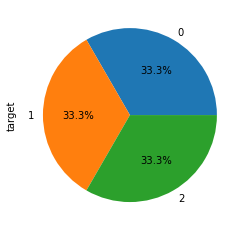

In [5]:
df.target.value_counts().plot.pie(autopct='%.1f%%')


In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px


In [7]:
X = df.iloc[:,:-1]
y = df.target

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=.2, random_state=1)
clf1 =  GaussianNB()
clf2 = KNeighborsClassifier()
clf1.fit(xtrain,ytrain)
clf2.fit(xtrain,ytrain)
ypred1 = clf1.predict(X)
ypred2 = clf2.predict(X)
print("confusion matrix clf1")
print(confusion_matrix(y, ypred1))
print(classification_report(y,ypred1))
print('-'*25)
print("confusion matrix clf2")
print(confusion_matrix(y, ypred2))
print(classification_report(y,ypred2))


confusion matrix clf1
[[50  0  0]
 [ 0 46  4]
 [ 0  3 47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.92      0.93        50
           2       0.92      0.94      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

-------------------------
confusion matrix clf2
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

